### Neighborhood Similarity Analysis between Great Lakes Cities

In [217]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


#### Load and explore the data

In [36]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(url).text

In [37]:
soup = BeautifulSoup(source, 'xml')

table=soup.find('table')

#dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)

# Search all the postcode, borough, neighborhood 
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

In [38]:
df

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [39]:
df=df[df['Borough']!='Not assigned'] 
df.head(10)

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [48]:
#check if there is any row has unassigned Neighborhood name
dfnotassigned=df[df['Neighborhood']=='Not assigned']
dfnotassigned

,Postalcode,Borough,Neighborhood


In [68]:
#Load the geo data
geo_df=pd.read_csv('http://cocl.us/Geospatial_data')
geo_df

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [71]:
geo_df.rename(columns={'Postal Code':'Postalcode'},inplace=True)

geo_merged = pd.merge(geo_df, df, on='Postalcode')
geo_data=geo_merged[['Postalcode','Borough','Neighborhood','Latitude','Longitude']]

In [72]:
geo_data.head(10)

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [73]:
geo_data.shape

(103, 5)

#### As we can see, Toronto has over 100 neighborhoods, to refine our research, we will focus only on boroughs that contain the word Toronto.

In [145]:
toronto_data=geo_data[geo_data['Borough'].str.contains("Toronto")]
toronto_data.insert(1, 'City','Toronto', True)
toronto_data.head(10)

,Postalcode,City,Borough,Neighborhood,Latitude,Longitude
37,M4E,Toronto,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,Toronto,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,Toronto,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,Toronto,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Toronto,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Toronto,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Toronto,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
47,M4S,Toronto,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Toronto,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
49,M4V,Toronto,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


In [146]:
toronto_data.shape

(39, 6)

In [147]:
toronto_data=toronto_data.drop(columns=['Postalcode','Borough'])
toronto_data.head()

,City,Neighborhood,Latitude,Longitude
37,Toronto,The Beaches,43.676357,-79.293031
41,Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,Toronto,Studio District,43.659526,-79.340923
44,Toronto,Lawrence Park,43.728020,-79.388790


### Next we load and process the neighborhood data of Cleveland.

In [119]:
filepath = '/Users/penggao/Documents/GitHub/capstone/Cleveland_Neighborhoods.csv'

In [120]:
import pandas as pd

In [133]:

nRowsRead = 1000 # specify 'None' if want to read whole file
cleveland_data = pd.read_csv(filepath, delimiter=',', nrows = nRowsRead)
cleveland_data.dataframeName = 'Cleveland_Neighborhoods.csv'
cleveland_data.insert(0, 'City','Cleveland', True)

In [134]:
cleveland_data.shape

(33, 4)

In [135]:
cleveland_data.head()

,City,Neighborhood,Latitude,Longitude
0,Cleveland,"Asiatown, Cleveland",41.508833,-81.680417
1,Cleveland,"Bellaire-Puritas, Cleveland",41.433682,-81.800140
2,Cleveland,Broadway-Slavic Village,41.458056,-81.644722
3,Cleveland,Brooklyn Centre,41.453446,-81.699402
4,Cleveland,Buckeye-Shaker,41.483889,-81.590556


## Merge the two datasets

In [154]:
df_merged = pd.concat([toronto_data, cleveland_data])
print (df_merged.shape)

(72, 4)


In [155]:
df_merged


,City,Neighborhood,Latitude,Longitude
37,Toronto,The Beaches,43.676357,-79.293031
41,Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,Toronto,Studio District,43.659526,-79.340923
44,Toronto,Lawrence Park,43.728020,-79.388790
45,Toronto,Davisville North,43.712751,-79.390197
46,Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
47,Toronto,Davisville,43.704324,-79.388790
48,Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
49,Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


#### Drop the neighborhoods without coordinates information

In [156]:
df = df_merged.dropna()
print (df.shape)

(70, 4)


#### Once we combine the neighborhood data of two cities, we can obtain the venues of each neighborhood.

In [172]:
def getNearbyVenues(city, names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for city, name, lat, lng in zip(city, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            city,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City',
                             'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [173]:
CLIENT_ID = '4DQJXTXLOUUDKRS1GEDQ1Z0PMPVU2DXSVHGRXJLYTQCYUUCK' # your Foursquare ID
CLIENT_SECRET = '0ARWNVVXWNYQELG21B21IAUVLFDCOOD3ARNKCM11SVZGXXG5' # your Foursquare Secret
VERSION = '20180604'

In [174]:
venues = getNearbyVenues(df['City'],df['Neighborhood'],df['Latitude'],df['Longitude'])

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

In [302]:
venues

,City,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Toronto,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,Toronto,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,Toronto,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,Toronto,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,Toronto,The Beaches,43.676357,-79.293031,Seaspray Restaurant,43.678888,-79.298167,Asian Restaurant
5,Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
6,Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
7,Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
8,Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,La Diperie,43.677702,-79.352265,Ice Cream Shop
9,Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop


In [176]:
venues.shape

(2249, 8)

In [177]:
venues.groupby('Neighborhood').count()

,City,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
"Asiatown, Cleveland",15,15,15,15,15,15,15
"Bellaire-Puritas, Cleveland",10,10,10,10,10,10,10
Berczy Park,58,58,58,58,58,58,58
Broadway-Slavic Village,7,7,7,7,7,7,7
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22,22
Brooklyn Centre,12,12,12,12,12,12,12
Buckeye-Shaker,28,28,28,28,28,28,28
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",18,18,18,18,18,18,18
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16,16


In [181]:
# one hot encoding
df_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
df_onehot.drop(['Neighborhood'],axis=1,inplace=True) 
df_onehot.insert(loc=0, column='City', value=venues['City'] )
df_onehot.insert(loc=1, column='Neighborhood', value=venues['Neighborhood'] )
df_onehot.shape

(2249, 275)

In [187]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reset_index()
df_grouped.head()

,Neighborhood,ATM,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Night Market,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Pedestrian Plaza,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Piano Bar,Picnic Area,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Asiatown, 

### The next step is to find the most popular venues in each neighborhood.

In [189]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [322]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Asiatown, Cleveland",Rental Car Location,Gym,Furniture / Home Store,Sandwich Place,Gym / Fitness Center
1,"Bellaire-Puritas, Cleveland",Hotel,Gas Station,Deli / Bodega,Bar,New American Restaurant
2,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Farmers Market
3,Broadway-Slavic Village,Fast Food Restaurant,Pharmacy,Sandwich Place,Eastern European Restaurant,Grocery Store
4,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Bakery,Bar


In [323]:
neighborhoods_venues_sorted.shape

(69, 6)

## K-Means clustering

In [213]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



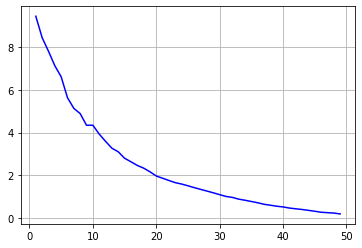

In [223]:
cost = []
df_grouped_clustering = df_grouped.drop('Neighborhood', 1)
for i in range (1,50):
    km=KMeans(n_clusters = i, max_iter = 2000, random_state=0).fit(df_grouped_clustering)
    
    cost.append(km.inertia_)

plt.plot(range(1,50), cost,color = "blue")
plt.grid()
plt.show()

In [324]:
# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([7, 7, 0, 7, 0, 7, 7, 7, 0, 7, 0, 7, 0, 0, 5, 0, 0, 7, 7, 0, 7, 0,
       3, 7, 0, 6, 0, 7, 7, 0, 0, 8, 7, 6, 7, 0, 5, 2, 1, 0, 9, 0, 0, 0,
       3, 0, 0, 0, 0, 6, 7, 0, 0, 0, 0, 7, 0, 0, 0, 7, 0, 7, 0, 7, 4, 0,
       0, 0, 7], dtype=int32)

In [325]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Asiatown, Cleveland",Rental Car Location,Gym,Furniture / Home Store,Sandwich Place,Gym / Fitness Center
1,"Bellaire-Puritas, Cleveland",Hotel,Gas Station,Deli / Bodega,Bar,New American Restaurant
2,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Farmers Market
3,Broadway-Slavic Village,Fast Food Restaurant,Pharmacy,Sandwich Place,Eastern European Restaurant,Grocery Store
4,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Bakery,Bar
5,Brooklyn Centre,Pizza Place,ATM,Intersection,Breakfast Spot,Mobile Phone Shop
6,Buckeye-Shaker,American Restaurant,Plaza,Mexican Restaurant,Bank,Fried Chicken Joint
7,"Business reply mail Processing Centre, South C...",Restaurant,Recording Studio,Smoke Shop,Skate Park,Spa
8,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Terminal,Airport Lounge,Airport Service,Coffee Shop,Boat or Ferry
9,Campus Disctict,Gas Station,Pet Service,Food,Bus Station,Camera Store


In [326]:
# add clustering labels
neighborhoods_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)


In [327]:
# 
cities_merged = df

# merge df(merged city information) with neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
cities_merged = cities_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
cities_merged = cities_merged.dropna()
cities_merged[['Cluster Labels']] = cities_merged[['Cluster Labels']].astype(int)

cities_merged

,City,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
37,Toronto,The Beaches,43.676357,-79.293031,7,Health Food Store,Asian Restaurant,Pub,Trail,Yoga Studio
41,Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Furniture / Home Store,Restaurant
42,Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,7,Park,Fast Food Restaurant,Gym,Italian Restaurant,Pet Store
43,Toronto,Studio District,43.659526,-79.340923,0,Coffee Shop,Café,Gastropub,American Restaurant,Brewery
44,Toronto,Lawrence Park,43.728020,-79.388790,2,Swim School,Bus Line,Park,Yoga Studio,Distribution Center
45,Toronto,Davisville North,43.712751,-79.390197,7,Food & Drink Shop,Park,Breakfast Spot,Pizza Place,Hotel
46,Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,0,Coffee Shop,Clothing Store,Yoga Studio,Chinese Restaurant,Spa
47,Toronto,Davisville,43.704324,-79.388790,0,Dessert Shop,Sandwich Place,Gym,Pizza Place,Coffee Shop
48,Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,9,Playground,Tennis Court,Trail,Yoga Studio,Eastern European Restaurant
49,Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0,Coffee Shop,Bagel Shop,American Restaurant,Bank,Sushi Restaurant


## Cluster analysis

### 1. Are the two cities similar to each other?

#### We can compare the numbers of different clusters in each city to find which one is the most important for its city.  Next step would be analyze the character of the dominant clusters: what make the cluster so different.

In [274]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


Solving environment: done

# All requested packages already installed.



In [312]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [317]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['Neighborhood'], cities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [328]:
address = 'Cleveland, OH'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cleveland are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cleveland are 41.5051613, -81.6934446.


In [329]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['Neighborhood'], cities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### From the maps we can see the dominant cluster are different in Toronto and Cleveland. We can group clusters in each city and figure out which clusters are most important.

#### Toronto

In [343]:
toronto_result = cities_merged[cities_merged ['City'] == 'Toronto'] # subset that city=Toronto
toronto_result_clusters = toronto_result.groupby('Cluster Labels').count() #Group by the cluster label
toronto_result_clusters

,City,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
Cluster Labels,,,,,,,,,
0,29,29,29,29,29,29,29,29,29
2,1,1,1,1,1,1,1,1,1
6,2,2,2,2,2,2,2,2,2
7,6,6,6,6,6,6,6,6,6
9,1,1,1,1,1,1,1,1,1


In [344]:
toronto_result_clusters=toronto_result_clusters.reset_index()

<function matplotlib.pyplot.show(*args, **kw)>

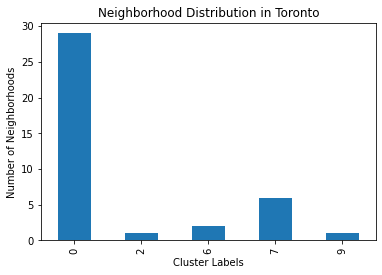

In [346]:
toronto_result_clusters.plot(kind='bar',x='Cluster Labels',y='Neighborhood',legend=False)
plt.title('Neighborhood Distribution in Toronto')
plt.ylabel('Number of Neighborhoods')
plt.show

#### Cleveland

In [347]:
cleveland_result = cities_merged[cities_merged ['City'] == 'Cleveland'] # subset that city=Toronto
cleveland_result_clusters = cleveland_result.groupby('Cluster Labels').count() #Group by the cluster label
cleveland_result_clusters

,City,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
Cluster Labels,,,,,,,,,
0,6,6,6,6,6,6,6,6,6
1,1,1,1,1,1,1,1,1,1
3,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1
5,2,2,2,2,2,2,2,2,2
6,1,1,1,1,1,1,1,1,1
7,16,16,16,16,16,16,16,16,16
8,1,1,1,1,1,1,1,1,1


In [349]:
cleveland_result_clusters=cleveland_result_clusters.reset_index()

<function matplotlib.pyplot.show(*args, **kw)>

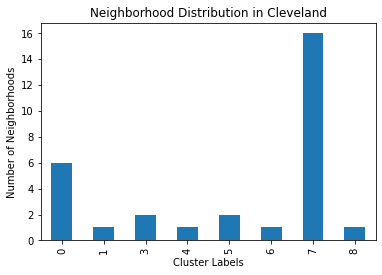

In [350]:
cleveland_result_clusters.plot(kind='bar',x='Cluster Labels',y='Neighborhood',legend=False)
plt.title('Neighborhood Distribution in Cleveland')
plt.ylabel('Number of Neighborhoods')
plt.show

#### Result shows that cluster 0 is the dominant cluster in Toronto, while it is cluster 7 in Cleveland.

In [362]:
cluster_0 = toronto_result[toronto_result['Cluster Labels'] == 0]
cluster_0_toronto=cluster_0[['City','Neighborhood','1st Most Common Venue']]
cluster_0_toronto.head()

,City,Neighborhood,1st Most Common Venue
41,Toronto,"The Danforth West, Riverdale",Greek Restaurant
43,Toronto,Studio District,Coffee Shop
46,Toronto,"North Toronto West, Lawrence Park",Coffee Shop
47,Toronto,Davisville,Dessert Shop
49,Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",Coffee Shop


In [363]:
cluster_7 = cleveland_result[cleveland_result['Cluster Labels'] == 7]
cluster_7_cleveland=cluster_7[['City','Neighborhood','1st Most Common Venue']]
cluster_7_cleveland.head()

,City,Neighborhood,1st Most Common Venue
0,Cleveland,"Asiatown, Cleveland",Rental Car Location
1,Cleveland,"Bellaire-Puritas, Cleveland",Hotel
2,Cleveland,Broadway-Slavic Village,Fast Food Restaurant
3,Cleveland,Brooklyn Centre,Pizza Place
4,Cleveland,Buckeye-Shaker,American Restaurant


In [360]:

cluster_0_toronto["1st Most Common Venue"].value_counts(normalize=True)

Coffee Shop         0.482759
Café                0.172414
Clothing Store      0.034483
Sushi Restaurant    0.034483
Gift Shop           0.034483
Bar                 0.034483
Grocery Store       0.034483
Airport Terminal    0.034483
Thai Restaurant     0.034483
Dessert Shop        0.034483
Greek Restaurant    0.034483
Sandwich Place      0.034483
Name: 1st Most Common Venue, dtype: float64

In [297]:
cluster_0["2nd Most Common Venue"].value_counts(normalize=True)

Café                  0.241379
Coffee Shop           0.137931
Restaurant            0.068966
Sandwich Place        0.068966
Bakery                0.068966
Sushi Restaurant      0.068966
Breakfast Spot        0.068966
Clothing Store        0.034483
Seafood Restaurant    0.034483
Bookstore             0.034483
Airport Lounge        0.034483
Hotel                 0.034483
Bagel Shop            0.034483
Aquarium              0.034483
Cocktail Bar          0.034483
Name: 2nd Most Common Venue, dtype: float64

In [298]:
cluster_0["3rd Most Common Venue"].value_counts(normalize=True)

Café                             0.172414
Coffee Shop                      0.137931
Italian Restaurant               0.068966
Bakery                           0.068966
Gastropub                        0.068966
Yoga Studio                      0.068966
Park                             0.068966
Hotel                            0.034483
Vietnamese Restaurant            0.034483
American Restaurant              0.034483
Mexican Restaurant               0.034483
Gym                              0.034483
Airport Service                  0.034483
Vegetarian / Vegan Restaurant    0.034483
Movie Theater                    0.034483
Japanese Restaurant              0.034483
Restaurant                       0.034483
Name: 3rd Most Common Venue, dtype: float64

In [361]:
cluster_7_cleveland["1st Most Common Venue"].value_counts(normalize=True)

American Restaurant         0.1875
Fast Food Restaurant        0.1250
Hotel                       0.0625
Park                        0.0625
Beer Bar                    0.0625
Gas Station                 0.0625
Pizza Place                 0.0625
Convenience Store           0.0625
Sandwich Place              0.0625
Clothing Store              0.0625
Chinese Restaurant          0.0625
Mediterranean Restaurant    0.0625
Rental Car Location         0.0625
Name: 1st Most Common Venue, dtype: float64

In [300]:
cluster_7["2nd Most Common Venue"].value_counts(normalize=True)

Plaza                 0.1875
ATM                   0.0625
Bar                   0.0625
Gas Station           0.0625
Pizza Place           0.0625
Camera Store          0.0625
Pet Service           0.0625
Dive Bar              0.0625
Gym                   0.0625
Chinese Restaurant    0.0625
Athletics & Sports    0.0625
Grocery Store         0.0625
Korean Restaurant     0.0625
Pharmacy              0.0625
Name: 2nd Most Common Venue, dtype: float64

In [301]:
cluster_7["3rd Most Common Venue"].value_counts(normalize=True)

Mexican Restaurant        0.1875
Sandwich Place            0.1250
Furniture / Home Store    0.0625
Gas Station               0.0625
Pizza Place               0.0625
Bike Shop                 0.0625
Convenience Store         0.0625
Intersection              0.0625
Imported Food Shop        0.0625
Deli / Bodega             0.0625
Fast Food Restaurant      0.0625
Food                      0.0625
Bank                      0.0625
Name: 3rd Most Common Venue, dtype: float64